<a href="https://colab.research.google.com/github/feniltailor22/Machine-Learning-Projects/blob/main/K_Nearest_Neighbour_on_Classified_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('Classified Data',index_col=0) 
#index_col is used to remove the number of columns from the dataframes  
#here we are removing the first column from the datasets, hence index_col=0

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
#Preprocessing the data as we don't know which feature have more impact(more weight) on our target function.
#Methods to preprocess the data- normalizer and StandardSCaler
#Here, we are using StandardScaler.
#StandardScaler- Standardize features by removing the mean and scaling to unit variance.
#It replace the current feature value with feature value by calculating z = (x - u) / s.
#Here x=current feature value, u=mean value of given feature column,s=std deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
#fitting the inputs of the datasets in StandardScaler (dropping the target values)
scaler.fit(df.drop('TARGET CLASS',axis=1)) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler_feature= scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
scaler_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [ ]:
df_feat= pd.DataFrame(data=scaler_feature,columns=df.columns[:-1])
#grabbing the column names except the the last column name i.e. 'TARGET CLASS'

In [ ]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df_feat,df['TARGET CLASS'],test_size=0.30,random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors=1,metric='minkowski')
#here n_neighbors representing K.
#metric= 'minkowski' is the distance metric to use for the tree. 
#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predictions= knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[151   8]
 [ 15 126]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
#checking the error rate (the error rate between predictions and actual ouput)
#if actual output and predictions is not same then take the mean of them 
np.mean(predictions != y_test)

0.07666666666666666

In [ ]:
#Finding the Best K value for KNN classifier 

In [ ]:
error_rate=[] #calculating the error rate for each K value

for i in range(1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  predictions_i= knn.predict(X_test)
  error_rate.append(np.mean(predictions_i != y_test))

In [ ]:
error_rate
#error rate for each K value (from i=1 to 40)

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

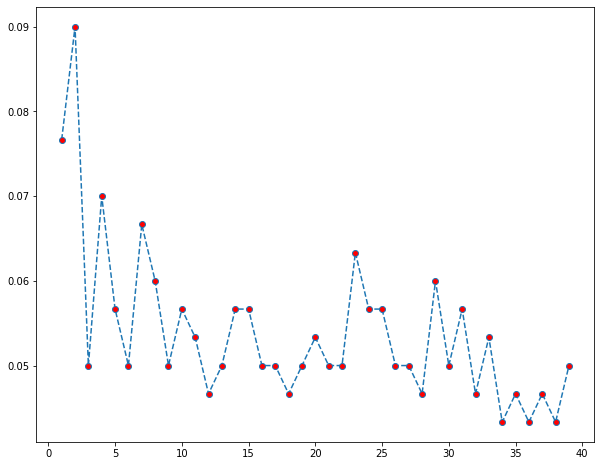

In [ ]:
#plotting error rate for each K value
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,linestyle='--',marker='o',markerfacecolor='red')

In [ ]:
#From the plot we can say that, for K=34,36 or 38 we can get the lowest error rate
#Trying K=36

In [ ]:
knn= KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train,y_train)
predictions_36= knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_36))

[[153   6]
 [  7 134]]


In [ ]:
print(classification_report(y_test,predictions_36))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

